Predicting Customer Churn in an E-commerce **Platform**

# New section

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [257]:
df = pd.read_csv('Bank_Customerchurn.csv')
df.head(3)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [258]:
df.drop('customer_id',axis=1,inplace=True)

In [259]:
# Data Preprocessing
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


EDA Univariate Analysis

<Axes: xlabel='gender'>

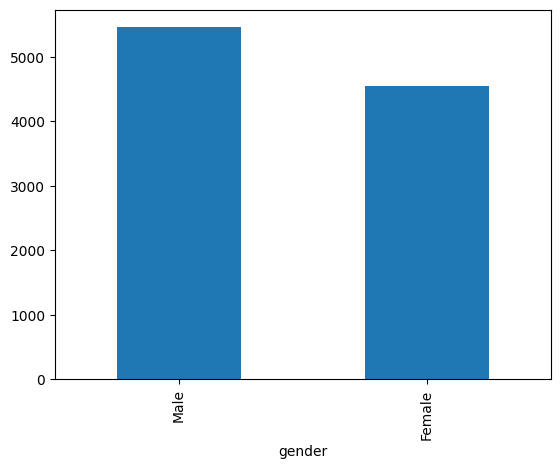

In [260]:
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

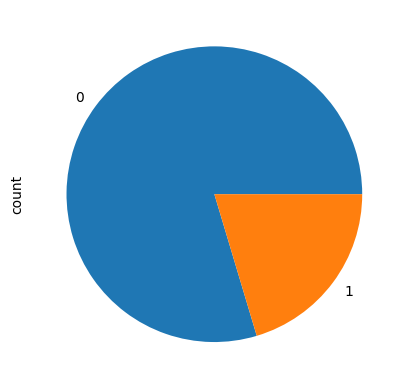

In [261]:
df['churn'].value_counts().plot(kind='pie')

(array([ 142.,  469., 1030., 1149., 1819., 1810.,  984.,  887.,  568.,
         260.,  294.,  229.,  130.,   78.,   79.,   48.,   12.,    8.,
           2.,    2.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ,
        58.7, 62.4, 66.1, 69.8, 73.5, 77.2, 80.9, 84.6, 88.3, 92. ]),
 <BarContainer object of 20 artists>)

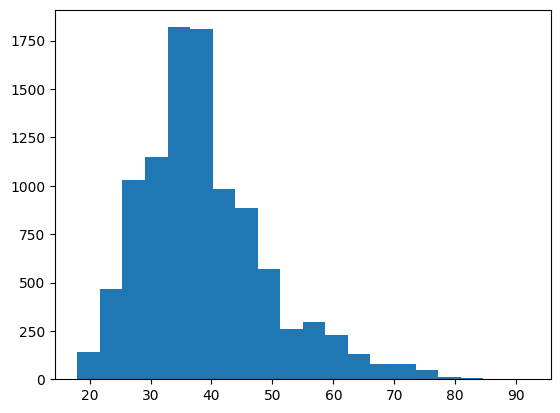

In [262]:
plt.hist(df['age'],bins=20)

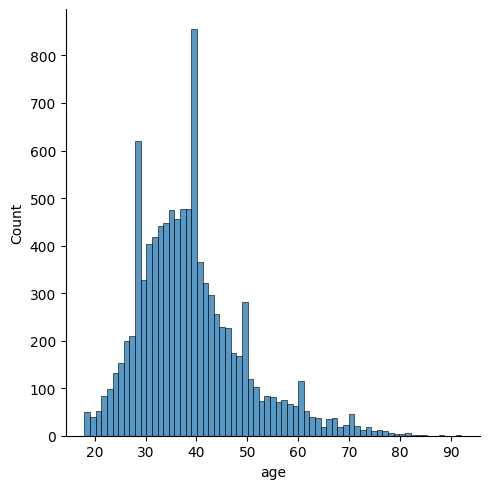

In [263]:
#Distribution Plot
sns.displot(df['age'])

In [264]:
#Boxplot
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: ylabel='age'>

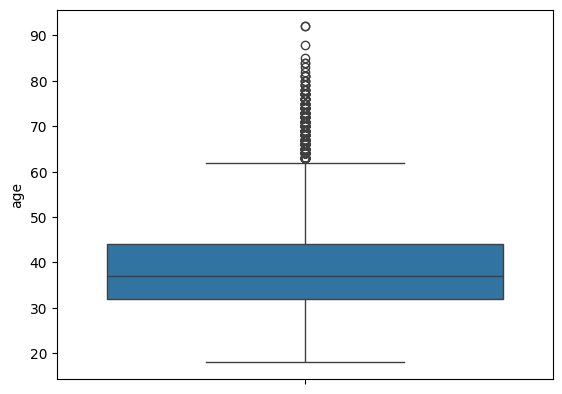

In [265]:
sns.boxplot(df['age'])

In [266]:
df['gender']=df['gender'].map({'Male':1,'Female':0})

In [267]:
df['country'] = df['country'].map({'France':0,'Spain':1,'Germany':2})

In [268]:
#Train Test Split
X = df.drop('churn',axis=1)
Y =df['churn']

In [269]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42) 

In [270]:
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming X_train is your training data
sclr = StandardScaler()
X_train = sclr.fit_transform(X_train)
X_test = sclr.fit_transform(X_test)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sclr, f)

In [271]:
#Training Model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [272]:
y_pred = lg.predict(X_test)

In [273]:
accuracy_score(y_test,y_pred)

0.8145

In [274]:
models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier()
}

for name,mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"{name} with accuracy {accuracy_score(y_test,y_pred)}")

lg with accuracy 0.8145
dtc with accuracy 0.784
rfc with accuracy 0.871


In [275]:
#Model selection
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = mod.predict(X_test)


In [276]:
#Prediction System
def prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
    pred = rfc.predict(features).reshape(1,-1)
    return pred[0]

In [277]:
credit_score = 608
country = 2
gender = 0
age= 41
tenure= 1
balance = 83807.86
products_number= 1
credit_card = 0
active_member =1
estimated_salary = 112542.58

pred  = prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary)

In [278]:
if pred == 0:
    print("This customer is still there")
else:
    print("This customer is left")

This customer is still there


In [279]:
#0	42	2	0.00	1	1	1	101348.88	
# 1	608	1	0	41	1	83807.86	1	0	1	112542.58

In [280]:
import pickle
pickle.dump(rfc,open('rfc_bank.pkl','wb'))
pickle.dump(df,open('dfbankchurn.pkl','wb'))